In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
dataset=pd.read_excel('Salary.xlsx')
dataset.head()

,Experience,Salary
0,15,3000
1,18,3600
2,20,4000
3,22,4400
4,24,4800


In [9]:
dataset

,Experience,Salary
0,15,3000
1,18,3600
2,20,4000
3,22,4400
4,24,4800
5,28,5600
6,29,5800
7,84,16800
8,73,14600


In [10]:
dataset.isnull().sum()

,0
Experience,0
Salary,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Experience  9 non-null      int64
 1   Salary      9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


# Split the train and test

In [13]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [16]:
x.head()

,Experience
0,15
1,18
2,20
3,22
4,24


In [18]:
y.head()

,Salary
0,3000
1,3600
2,4000
3,4400
4,4800


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
x_train

,Experience
1,18
4,24
8,73
6,29
3,22
0,15
5,28


In [21]:
y_train

,Salary
1,3600
4,4800
8,14600
6,5800
3,4400
0,3000
5,5600


In [22]:
x_test

,Experience
7,84
2,20


In [23]:
y_test

,Salary
7,16800
2,4000


# Build the Model

**Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

**Model Building**

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

# Predict on train

In [27]:
y_pred_train=lr.predict(x_train)
y_pred_train # Predicted result for training data

array([ 3600.,  4800., 14600.,  5800.,  4400.,  3000.,  5600.])

In [28]:
y_train # Actual result for training data

,Salary
1,3600
4,4800
8,14600
6,5800
3,4400
0,3000
5,5600


**check the metrics**

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
mean_absolute_error(y_train,y_pred_train)

1.2992781453898974e-13

In [47]:
mean_squared_error(y_train,y_pred_train)

5.90843294680734e-26

In [49]:
r2_score(y_train,y_pred_train) *100

100.0

In [36]:
y_train.values,y_pred_train

(array([ 3600,  4800, 14600,  5800,  4400,  3000,  5600]),
 array([ 3600.,  4800., 14600.,  5800.,  4400.,  3000.,  5600.]))

# Predict on Test

In [52]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([16800.,  4000.])

In [53]:
y_test

,Salary
7,16800
2,4000


In [54]:
mean_absolute_error(y_test,y_pred_test)

2.0463630789890885e-12

In [55]:
mean_squared_error(y_test,y_pred_test)

6.72084247699335e-24

In [56]:
r2_score(y_test,y_pred_test) *100

100.0

# Predict on unseen data

In [57]:
dataset

,Experience,Salary
0,15,3000
1,18,3600
2,20,4000
3,22,4400
4,24,4800
5,28,5600
6,29,5800
7,84,16800
8,73,14600


In [59]:
lr.predict([[100]])

array([20000.])

In [60]:
lr.predict([[10]])

array([2000.])

# END OF CODE

_______________________________________________________________________________________________________________________________________________________

# Doubts

**Standand deviation , standard scalar , normalization**

# Visualization

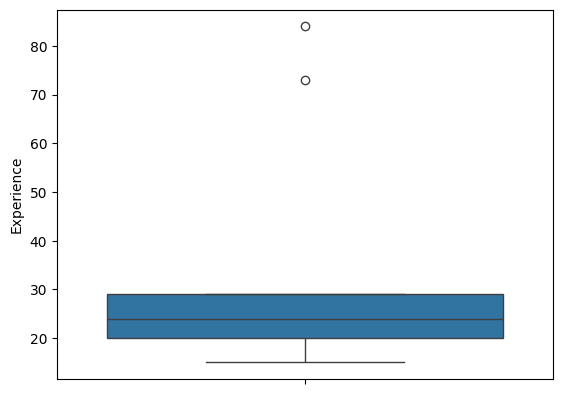

In [ ]:
sns.boxplot(y='Experience',data=dataset)
plt.show()

In [5]:
dataset['Experience'].value_counts()

,count
Experience,
15,1
18,1
20,1
22,1
24,1
28,1
29,1
84,1
73,1


In [ ]:
dataset['Experience']= dataset['Experience'].fillna(dataset['Experience'].median())


In [ ]:
dataset.isnull().sum()

Experience    0
Salary        0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Experience  9 non-null      int64
 1   Salary      9 non-null      int64
dtypes: int64(2)
memory usage: 276.0 bytes


In [ ]:
x=dataset.iloc[:0:1]
y=dataset.iloc[:,1]

In [ ]:
x
y

0     3000
1     3600
2     4000
3     4400
4     4800
5     5600
6     5800
7    16800
8    14600
Name: Salary, dtype: int64

In [ ]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)

print(Q1)
print(Q3)


Experience      20.0
Salary        4000.0
Name: 0.25, dtype: float64
Experience      29.0
Salary        5800.0
Name: 0.75, dtype: float64


In [ ]:
IQR = Q3 - Q1
print(IQR)

Experience       9.0
Salary        1800.0
dtype: float64


<Axes: ylabel='Experience'>

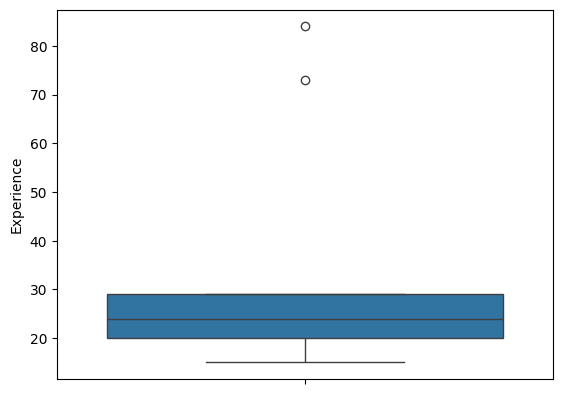

In [ ]:
sns.boxplot(y='Experience',data=dataset)

In [ ]:
dataset.head()

,Experience,Salary
0,15,3000
1,18,3600
2,20,4000
3,22,4400
4,24,4800


In [ ]:
from sklearn.preprocessing import StandardScaler
stand_scaler= StandardScaler()
x_stand= stand_scaler.fit_transform(dataset)

In [ ]:
x_stand

array([[-0.82811302, -0.82811302],
       [-0.70250037, -0.70250037],
       [-0.61875861, -0.61875861],
       [-0.53501684, -0.53501684],
       [-0.45127507, -0.45127507],
       [-0.28379154, -0.28379154],
       [-0.24192066, -0.24192066],
       [ 2.06097792,  2.06097792],
       [ 1.6003982 ,  1.6003982 ]])

In [ ]:
pd.DataFrame(x_stand)

,0,1
0,-0.828113,-0.828113
1,-0.702500,-0.702500
2,-0.618759,-0.618759
3,-0.535017,-0.535017
4,-0.451275,-0.451275
5,-0.283792,-0.283792
6,-0.241921,-0.241921
7,2.060978,2.060978
8,1.600398,1.600398


In [ ]:
from sklearn.preprocessing import Normalizer
normal_scaler= Normalizer()
x_norm= normal_scaler.fit_transform(dataset)

In [ ]:
pd.DataFrame(x_norm)

,0,1
0,0.005,0.999988
1,0.005,0.999988
2,0.005,0.999988
3,0.005,0.999988
4,0.005,0.999988
5,0.005,0.999988
6,0.005,0.999988
7,0.005,0.999988
8,0.005,0.999988


In [ ]:
print(x_train.shape)
print(x_test.shape)


NameError: name 'x_train' is not defined